# 매개변수 갱신

<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    [Review] 신경망 학습의 목적 
</span><br>

: 손실 함수의 값을 가능한 한 낮추는 매개변수를 찾는 것

: 즉, 매개변수의 최적값을 찾는 문제 (최적화, optimization) <br><br><br>
  

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    1. 확률적 경사 하강법(SGD)
</span><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;1) 개념</b><br><br>

: w에 대한 손실 함수의 gradient를 이용해 변수의 값을 갱신/ 본 단계를 여러 번 반복하면서 서서히 함수의 값을 줄임<br><br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;2) 수식</b><br><br>
: $W$ - 갱신할 가중치 매개변수<br>
: $∂L/∂W$ - $W$에 대한 손실함수의 gradient<br>
: $η$ - Learning rate<br>

<img src = ".\deep_learning_images\e 6.1.png" height = 15% width = 15% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[식 6.1] SGD</span></div>

<br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;3) 구현</b><br>

In [6]:
class SGD:
    def __init__(self, lr=0.01):
        selff.lr = lr  # lr == learning rate

    def update(self, params, grads):
        for key in params.keys():
            params[key] -= self.lr * grads[key]

<b>&nbsp;&nbsp;&nbsp;&nbsp;4) 단점</b><br><br>
: 비등방성 함수(anisotropy func.)에서는 탐색 경로가 비효율적임

> <b>비등방성 함수</b><br><br>
> : 방향에 따라 성질(gradient)이 달라지는 함수<br>
> : 예)<br>
> <img src = ".\deep_learning_images\e 6.2.png" height = 20% width = 20% align = "center">
> <div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[식 6.2] 비등방성 함수의 예</span></div>
> <img src = ".\deep_learning_images\fig 6-2.png" height = 35% width = 35% align = "center">
> <div style="text-align: center"><span style = 'color : silver; font-size : 13px'>식 6.2의 gradient</span></div>
> <img src = ".\deep_learning_images\fig 6-3.png" height = 35% width = 35% align = "center">
> <div style="text-align: center"><span style = 'color : silver; font-size : 13px'>식 6.2의 최적화 경로</span></div>

<br>
<br>


<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    2. 모멘텀(Momentum)
</span><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;1) 개념</b><br><br>

: '기울기 방향으로 힘을 받아 물체가 가속된다'는 물리법칙에 기반한 최적화 방식

: w가 감소하던(증가하던) 방향으로 더 많이 변함(가속됨) <br><br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;2) 수식</b><br><br>
: $W$ - 갱신할 가중치 매개변수<br>
: $∂L/∂W$ - $W$에 대한 손실함수의 gradient<br>
: $η$ - Learning rate<br>
: $v$ - 속도(velocity)<br>
: $α$ - 아무런 힘을 받지 않을 때 서서히 하강시키는 역할<br>
<img src = ".\deep_learning_images\e 6.3.png" height = 15% width = 15% align = "center">
<img src = ".\deep_learning_images\e 6.4.png" height = 15% width = 15% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[식 6.4] 모멘텀</span></div>

<b>&nbsp;&nbsp;&nbsp;&nbsp;3) 구현</b><br><br>

In [2]:
class Momentum:
    def __init__(self, lr=0.01, momentum=0.9):
        self.lr = lr
        self.momentum = momentum
        self.v = None

    def update(self, params, grads):
        # v 초기화
        if self.v is None: 
            self.v = {}
            for key, val in params.items():
                self.v[key] = np.zeros_like(val)

        for key in params.keys():
            self.v[key] = self.momentum * self.v[key] - self.lr * grads[key]
            params[key] += self.v[key]

<br><br>

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    3. AdaGrad
</span><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;0) 학습률 감소(learning rate decay)</b><br><br>

: 학습을 진행하면서 학습률을 점차 줄여가는 방법


: 처음에는 크게 학습 → 조금씩 작게 학습 <br><br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;1) 개념</b><br><br>

: 각각의 매개변수에 적응적으로 학습률을 조정하면서 학습을 진행


: 학습률 감소를 발전시킨 것<br><br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;2) 수식</b><br><br>
: $W$ - 갱신할 가중치 매개변수<br>
: $∂L/∂W$ - $W$에 대한 손실함수의 gradient<br>
: $η$ - Learning rate<br>
: $h$ - 기존 기울기 값을 제곱하여 계속 더해줌 / 이를 통해 lr 조절<br>
&nbsp;&nbsp;&nbsp;&nbsp;- 즉, 크게 갱신된(gradient가 큰) 원소는 학습률이 감소함 (개별 매개변수에 적응적으로 학습률 조정)


&nbsp;&nbsp;&nbsp;&nbsp;- 과거의 기울기를 제곱하여 계속 더함 (점점 갱신 강도가 약해짐, learning rate decay)


<img src = ".\deep_learning_images\e 6.5.png" height = 15% width = 15% align = "center">
<img src = ".\deep_learning_images\e 6.6.png" height = 15% width = 15% align = "center">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>[식 6.6] AdaGrad</span></div>

<b>&nbsp;&nbsp;&nbsp;&nbsp;3) 구현</b>

In [4]:
class AdaGrad:
    def __init__(self, lr=0.01):
        self.lr = lr
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] += grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7) # 1e-7 : h가 0이 되는 것을 방지

<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;4) 단점</b><br><br>
: 무한히 계속 학습한다면, 어느 순간 갱신량이 0이 되어 전혀 갱신되지 않음

: 즉, 최소값에 도달하기 전에 학습률이 0에 수렴할 수도 있음

<br><br>


<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    4. RMSProp
</span><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;1) 개념</b><br><br>

: 지수 이동 평균(EMA, Exponential Moving Average)을 사용하여 최신 기울기들이 더 크게 반영되도록 함

: AdaGrade의 단점을 개선한 방법<br><br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;2) 수식</b><br><br>
: $W$ - 갱신할 가중치 매개변수<br>
: $∂L/∂W$ - $W$에 대한 손실함수의 gradient<br>
: $η$ - Learning rate<br>
: $h$ - 기존 기울기 값을 제곱하여 계속 더해줌 / 이를 통해 lr 조절<br>
: $ρ$ - 최신 기울기들이 더 크게 반영되도록 함<br>

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F99EB61355D1201882B3374" height = 30% width = 30% align = "center" style="background-color : white">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>RMSProp</span></div>

<b>&nbsp;&nbsp;&nbsp;&nbsp;3) 구현</b>

In [5]:
class RMSprop:
    def __init__(self, lr=0.01, decay_rate=0.99):
        self.lr = lr
        self.decay_rate = decay_rate # decay_rate == rou
        self.h = None

    def update(self, params, grads):
        if self.h is None:
            self.h = {}
            for key, val in params.items():
                self.h[key] = np.zeros_like(val)

        for key in params.keys():
            self.h[key] *= self.decay_rate
            self.h[key] += (1 - self.decay_rate) * grads[key] * grads[key]
            params[key] -= self.lr * grads[key] / (np.sqrt(self.h[key]) + 1e-7)

<br>
<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    5. Adam
</span><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;1) 개념</b><br><br>

: AdaGrad + Momentum <br><br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;2) 구현</b>

In [7]:
class Adam:
    def __init__(self, lr=0.001, beta1=0.9, beta2=0.999):
        self.lr = lr
        self.beta1 = beta1
        self.beta2 = beta2
        self.iter = 0
        self.m = None
        self.v = None

    def update(self, params, grads):
        if self.m is None:
            self.m, self.v = {}, {}
            for key, val in params.items():
                self.m[key] = np.zeros_like(val)
                self.v[key] = np.zeros_like(val)

        self.iter += 1
        lr_t = self.lr * np.sqrt(1.0 - self.beta2**self.iter) / (
            1.0 - self.beta1**self.iter)

        for key in params.keys():
            #self.m[key] = self.beta1*self.m[key] + (1-self.beta1)*grads[key]
            #self.v[key] = self.beta2*self.v[key] + (1-self.beta2)*(grads[key]**2)
            self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
            self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])

            params[key] -= lr_t * self.m[key] / (np.sqrt(self.v[key]) + 1e-7)

            #unbias_m += (1 - self.beta1) * (grads[key] - self.m[key]) # correct bias
            #unbisa_b += (1 - self.beta2) * (grads[key]*grads[key] - self.v[key]) # correct bias
            #params[key] += self.lr * unbias_m / (np.sqrt(unbisa_b) + 1e-7)

<span style = 'color : black; background : skyblue; padding : 2px; font-weight : bold'>
    [정리]
</span><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;1) 최적화 기법</b>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile22.uf.tistory.com%2Fimage%2F99E889415D15C0E61FD071" height = 60% width = 60% align = "center" style="background-color : white">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>최적화 종류</span></div>

<br><br>

<b>&nbsp;&nbsp;&nbsp;&nbsp;2) [식 6.2] 갱신 경로 비교 </b><br><br>
: <span style = 'color : black; background : yellow; padding : 2px; font-weight : bold'>
    [SGD]
</span> &nbsp;&nbsp;무작정 기울어진 방향으로 이동함에 따라 비등방성 함수에서는 탐색 경로가 매우 비효율 적임

: <span style = 'color : black; background : yellow; padding : 2px; font-weight : bold'>
    [Momentum]
</span> &nbsp;&nbsp;w가 감소하던 x축 방향으로 가속하여 SGD에 비해 안정적 / 단, y축 방향의 속도는 안정적이지 않음

: <span style = 'color : black; background : yellow; padding : 2px; font-weight : bold'>
    [AdaGrad]
</span> &nbsp;&nbsp;큰 움직임에 비례해 갱신 정도도 큰 폭으로 작아지므로 y축 방향으로의 갱신 강도가 빠르게 약해짐

: <span style = 'color : black; background : yellow; padding : 2px; font-weight : bold'>
    [Adam]
</span> &nbsp;&nbsp;AdaGrad + Momentum

<br><br>

__⇒ 즉, 풀어야 할 문제에 따라 선택해야 함__


<img src = ".\deep_learning_images\fig 6-8.png" height = 60% width = 60% align = "center" style="background-color : white">
<div style="text-align: center"><span style = 'color : silver; font-size : 13px'>최적화 종류</span></div>

<br>
<b>&nbsp;&nbsp;&nbsp;&nbsp;3) MNIST에 적용 </b>

===========iteration:0===========
SGD:2.2919706257956465
Momentum:2.41798631935199
AdaGrad:2.032358117142564
Adam:2.3220586779982697
RMSprop:13.147382571681689
===========iteration:100===========
SGD:1.5470054505091744
Momentum:0.34830040163110515
AdaGrad:0.1131110584842602
Adam:0.2211819340715494
RMSprop:0.3190639668570705
===========iteration:200===========
SGD:0.9431366649846076
Momentum:0.23368285295151023
AdaGrad:0.08171633135754884
Adam:0.17717438238107686
RMSprop:0.21945991508094045
===========iteration:300===========
SGD:0.6166733271192372
Momentum:0.168021200517723
AdaGrad:0.07666122071495254
Adam:0.12791466331468254
RMSprop:0.17034608335692245
===========iteration:400===========
SGD:0.39019446785286316
Momentum:0.22257431216480847
AdaGrad:0.11022967740411165
Adam:0.1444357623309624
RMSprop:0.18899047282003234
===========iteration:500===========
SGD:0.3476256933295543
Momentum:0.06909477179590619
AdaGrad:0.02454329408584168
Adam:0.04290125125365405
RMSprop:0.25330534896627055


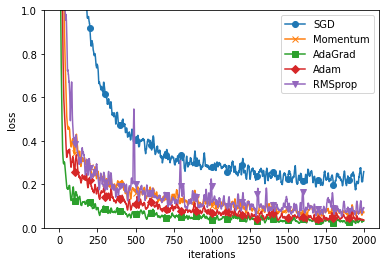

In [9]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

# 0. MNIST 데이터 읽기==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

# 1. 실험용 설정==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784,
                                  hidden_size_list=[100, 100, 100, 100],
                                  output_size=10)
    train_loss[key] = []

# 2. 훈련 시작==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

# 3. 그래프 그리기==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D", "RMSprop": "v"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x,
             smooth_curve(train_loss[key]),
             marker=markers[key],
             markevery=100,
             label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()